# Image Classification

### Import necessary libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
import warnings 
warnings.filterwarnings('ignore')

### Read all the file names in all 4 folders (ships, planes, bikes, cars)

In [32]:
ships = glob.glob('VEHICLES/ships/*.*')
planes = glob.glob('VEHICLES/planes/*.*')
bikes = glob.glob('VEHICLES/bikes/*.*')
cars = glob.glob('VEHICLES/cars/*.*')

### Read image data from all files and store it in a variable, Store the label as well

In [33]:
image = []
label = []

for i in ships:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in planes:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in bikes:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in cars:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

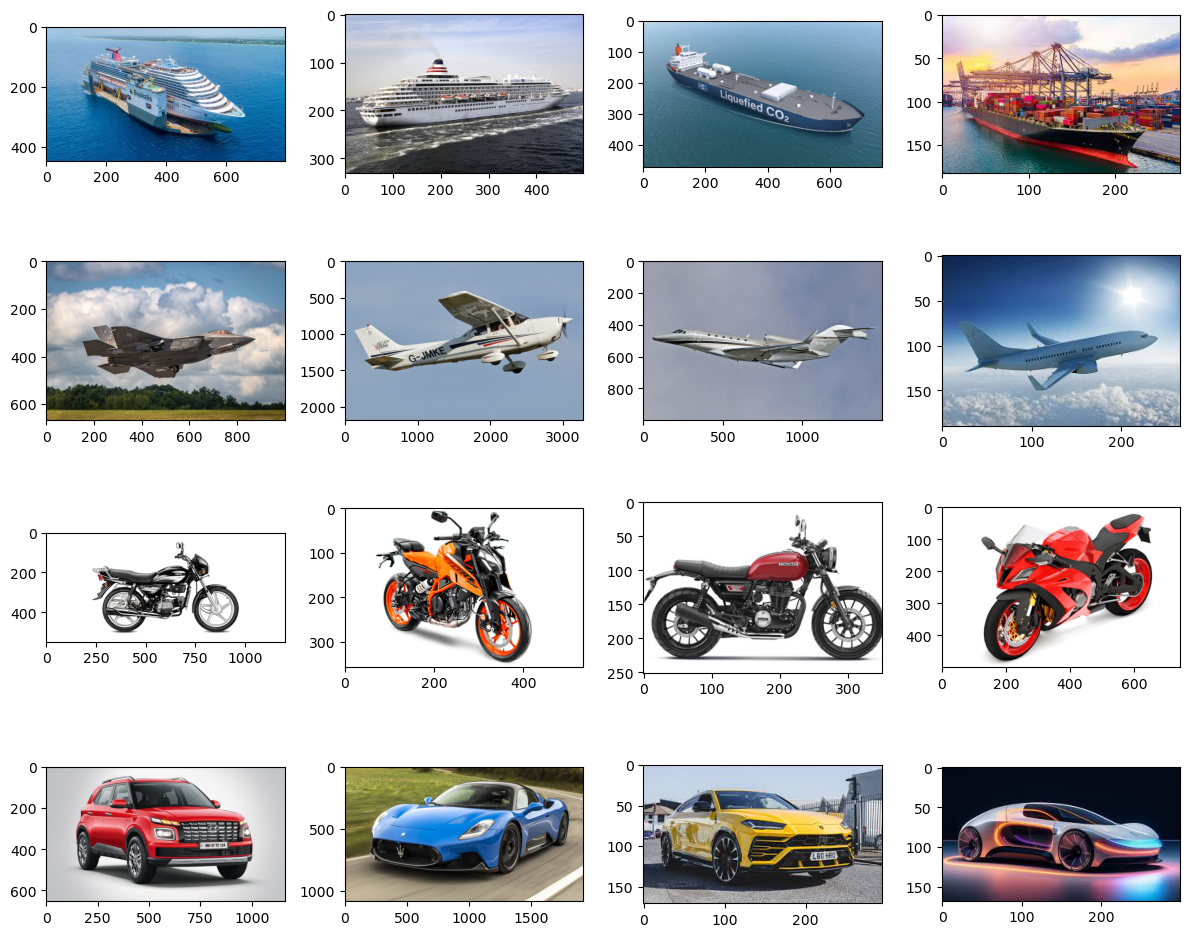

In [34]:
plt.figure(figsize = (12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [35]:
image, label = shuffle(image, label)

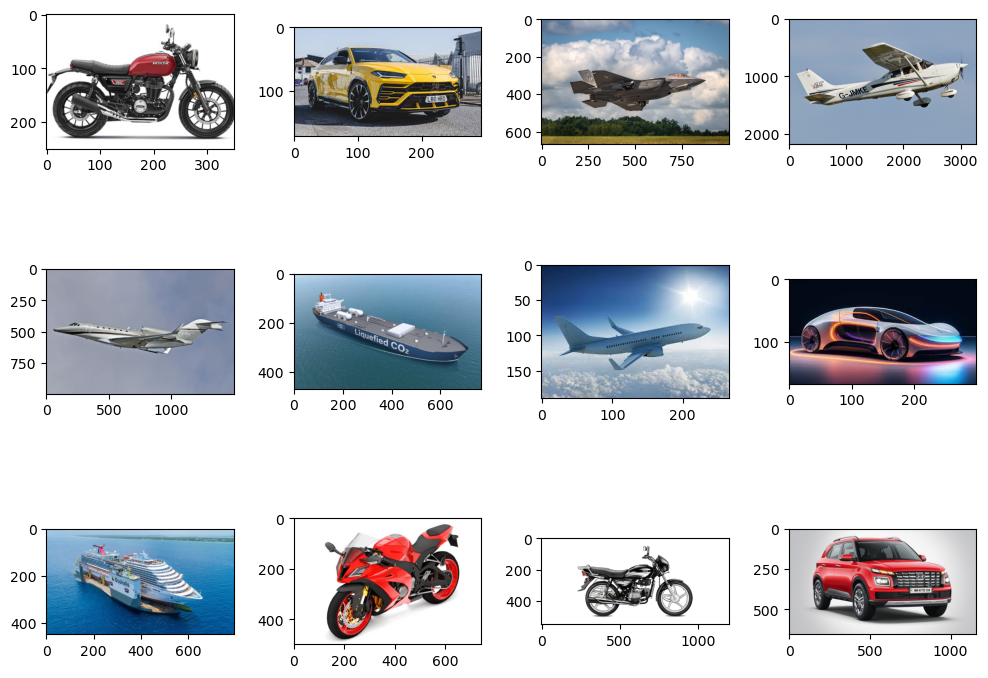

In [36]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [37]:
for i in range(10):
    print(image[i].shape)

(251, 350, 3)
(171, 294, 3)
(667, 1000, 3)
(2184, 3276, 3)
(1000, 1500, 3)
(471, 768, 3)
(190, 266, 3)
(168, 300, 3)
(447, 795, 3)
(500, 744, 3)


In [38]:
X = []

for i in image:
    X.append(resize(i, (128,128,3)))

In [39]:
X = np.array(X)

In [40]:
y = np.array(label)

In [41]:
d1, d2, d3, d4 = X.shape

In [42]:
X = X.reshape((d1, d2*d3*d4))

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC()

In [47]:
%time model.fit(X_train, y_train)

CPU times: user 8.66 ms, sys: 1.8 ms, total: 10.5 ms
Wall time: 10.7 ms


SVC()

In [48]:
%time y_pred = model.predict(X_test)

CPU times: user 2.25 ms, sys: 597 µs, total: 2.84 ms
Wall time: 2.17 ms


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
accuracy_score(y_test,y_pred)

0.5

<Axes: >

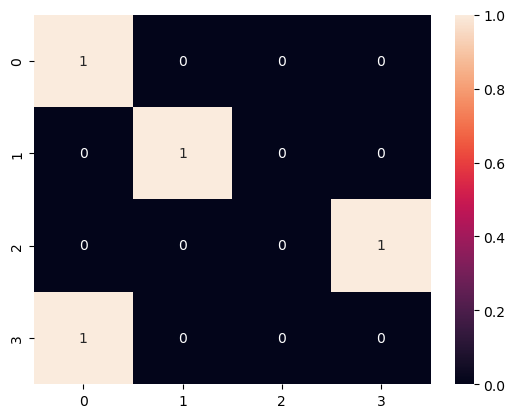

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.38      0.50      0.42         4
weighted avg       0.38      0.50      0.42         4

